## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict

from bs4 import BeautifulSoup
import re
import json
# from requests_html import HTMLSession
import requests
from collections import Counter
from pathlib import Path
from os import path
from tqdm import tqdm
from time import sleep
import pickle
from utilss import *


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olawumiolasunkanmi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/olawumiolasunkanmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-04-19 17:48:00.546 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-04-19 17:48:00.551 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-04-19 17:48:00.553 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-04-19 17:48:00.553 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-04-19 17:48:00.554 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [153]:

from cachetools import cached, TTLCache
cache = TTLCache(maxsize=100, ttl=86400)

 

# Visualisation libraries
# import plotly.express as px
# import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# from ckg_functions import dotplot
# from entity_options import get_entity_options
# from sklearn.decomposition import PCA


# from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords
stopwords_ = set(stopwords.words("english"))
import spacy
from spacy import displacy
import en_ner_bionlp13cg_md
from spacy.matcher import Matcher 
from spacy.tokens import Span 


from requests.exceptions import ConnectionError
# from PyPDF2 import PdfFileReader
# s = HTMLSession()
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
#Files path
dir = "COVIDKG"




Not_interested = ['Abstract']
top_section = ['Introduction', 'Background', 'Objectives']
main_section = [ 'Literature Review', 'Related Work', 'Methods', 'Method', 'Methodology', 'Results', 'Discussion', 'Results and Discussion', 'Conclusion', 'Appendices', 'Appendice']
botton_section = ['Author contributions', 'Acknowledgments', 'Acknowledgement', 'ACKNOWLEDGMENT', 'ACKNOWLEDGMENTS', 'Copyright', 'Conflict of interest', 'keywords', 'Key Words', 'Key Words', 'Competing interests', 'Data availability statement', 'Ethics statement', 'Ethics approval', 'References', 'Bibliography']
sections = Not_interested + top_section + main_section + botton_section
for s in sections+['Table', 'Figure', 'et.', 'et', 'al.', 'al', 'i.e.', 'ie.,', 'Title', 'etc.']:
    stopwords_.add(s)
stopwords_ = list(stopwords_)

In [183]:
nresults = 10
query = "covid-19"
# "Sars-Cov2 Sitosterol, drug, protein, genes"
# query = '"COVID-19" OR Coronavirus OR "Corona virus" OR "2019-nCoV" OR "SARS-CoV" OR "MERS-CoV" OR "Severe Acute Respiratory Syndrome" OR "Middle East Respiratory Syndrome" OR pmc phe collection[Filter]'
# %time 
wc, results_df, _ = search_get_pmc(query, nresults)
# search_getPMC(query, nresults, dir)
# auths_firstnames = [a for auth in list(results_df.authors) for a in auth.split(' ')  if len(a)>2]
ids = tuple(results_df['paperId']) 

results_df.to_csv('res.csv', index = False)

In [486]:
results_df

,paperId,pubdate,authors,title,fulljournalname,fulltext,No of words
0,PMC10115307,2023 Apr 19,"[Hu Y, Zhou T, Li X, Chen X, Wang X, Xu J, Gu D]",Factors influencing return to work 3 months af...,PLOS ONE,Coronary heart disease (CHD) myocardial ischem...,3180
1,PMC10115328,2023 Mar 3,"[Mohta A, Nyati A, Mohta A, Ghiya BC, Mehta RD...",Histopathological Spectrum of Cutaneous Reacti...,Indian Dermatology Online Journal,"Since early December 2019, coronavirus disease...",1105
2,PMC10115259,2023 Apr 19,"[Umar N, Hill Z, Schellenberg J, Tuncalp Ö, Mu...",Women’s perceptions of telephone interviews ab...,PLOS Global Public Health,The high coverage mobile phones low-and middle...,3029
3,PMC10115550,2023 Apr 18,"[Alwakeel M, Alayan D, Saleem T, Afzal S, Imml...",Phenobarbital-Based Protocol for Alcohol Withd...,Critical Care Explorations,Question: Is phenobarbital (PB)-based protocol...,1855
4,PMC10115403,2023 Apr 19,"[Vega Thurber R, Hay M]",Mystery solved: Disease detectives identify th...,Science Advances,"In 1983, common sea urchin Diadema antillarum,...",825
5,PMC10115309,2023 Apr 7,"[Onasanya A, van Engelen J, Oladunni O, Oladep...",Social Network Analysis of the Schistosomiasis...,PLOS Neglected Tropical Diseases,Schistosomiasis Neglected Tropical Disease (NT...,2176
6,PMC10115347,2023 Apr 19,"[Batrancea LM, Nichita A, Balcı MA, Akgüller Ö]",Empirical investigation on how wellbeing-relat...,PLOS ONE,The phenomenon economic growth regarded import...,5542
7,PMC10115451,2023 Mar 27,"[Engdahl TB, Binshtein E, Brocato RL, Kuzmina ...",Antigenic mapping and functional characterizat...,eLife,Hantaviruses emerging zoonotic pathogens endem...,6392
8,PMC10115263,2023 Apr 19,"[Balatia H, Wincenciak J, Buck T]",The associations of anger and hope with projec...,PLOS ONE,"Although initially, role emotions feature sign...",5034
9,PMC10115470,2023 Apr 3,[Milosevic V],Different approaches to Imaging Mass Cytometry...,Bioinformatics Advances,Imaging Mass Cytometry (IMC) arisen powerful t...,5249


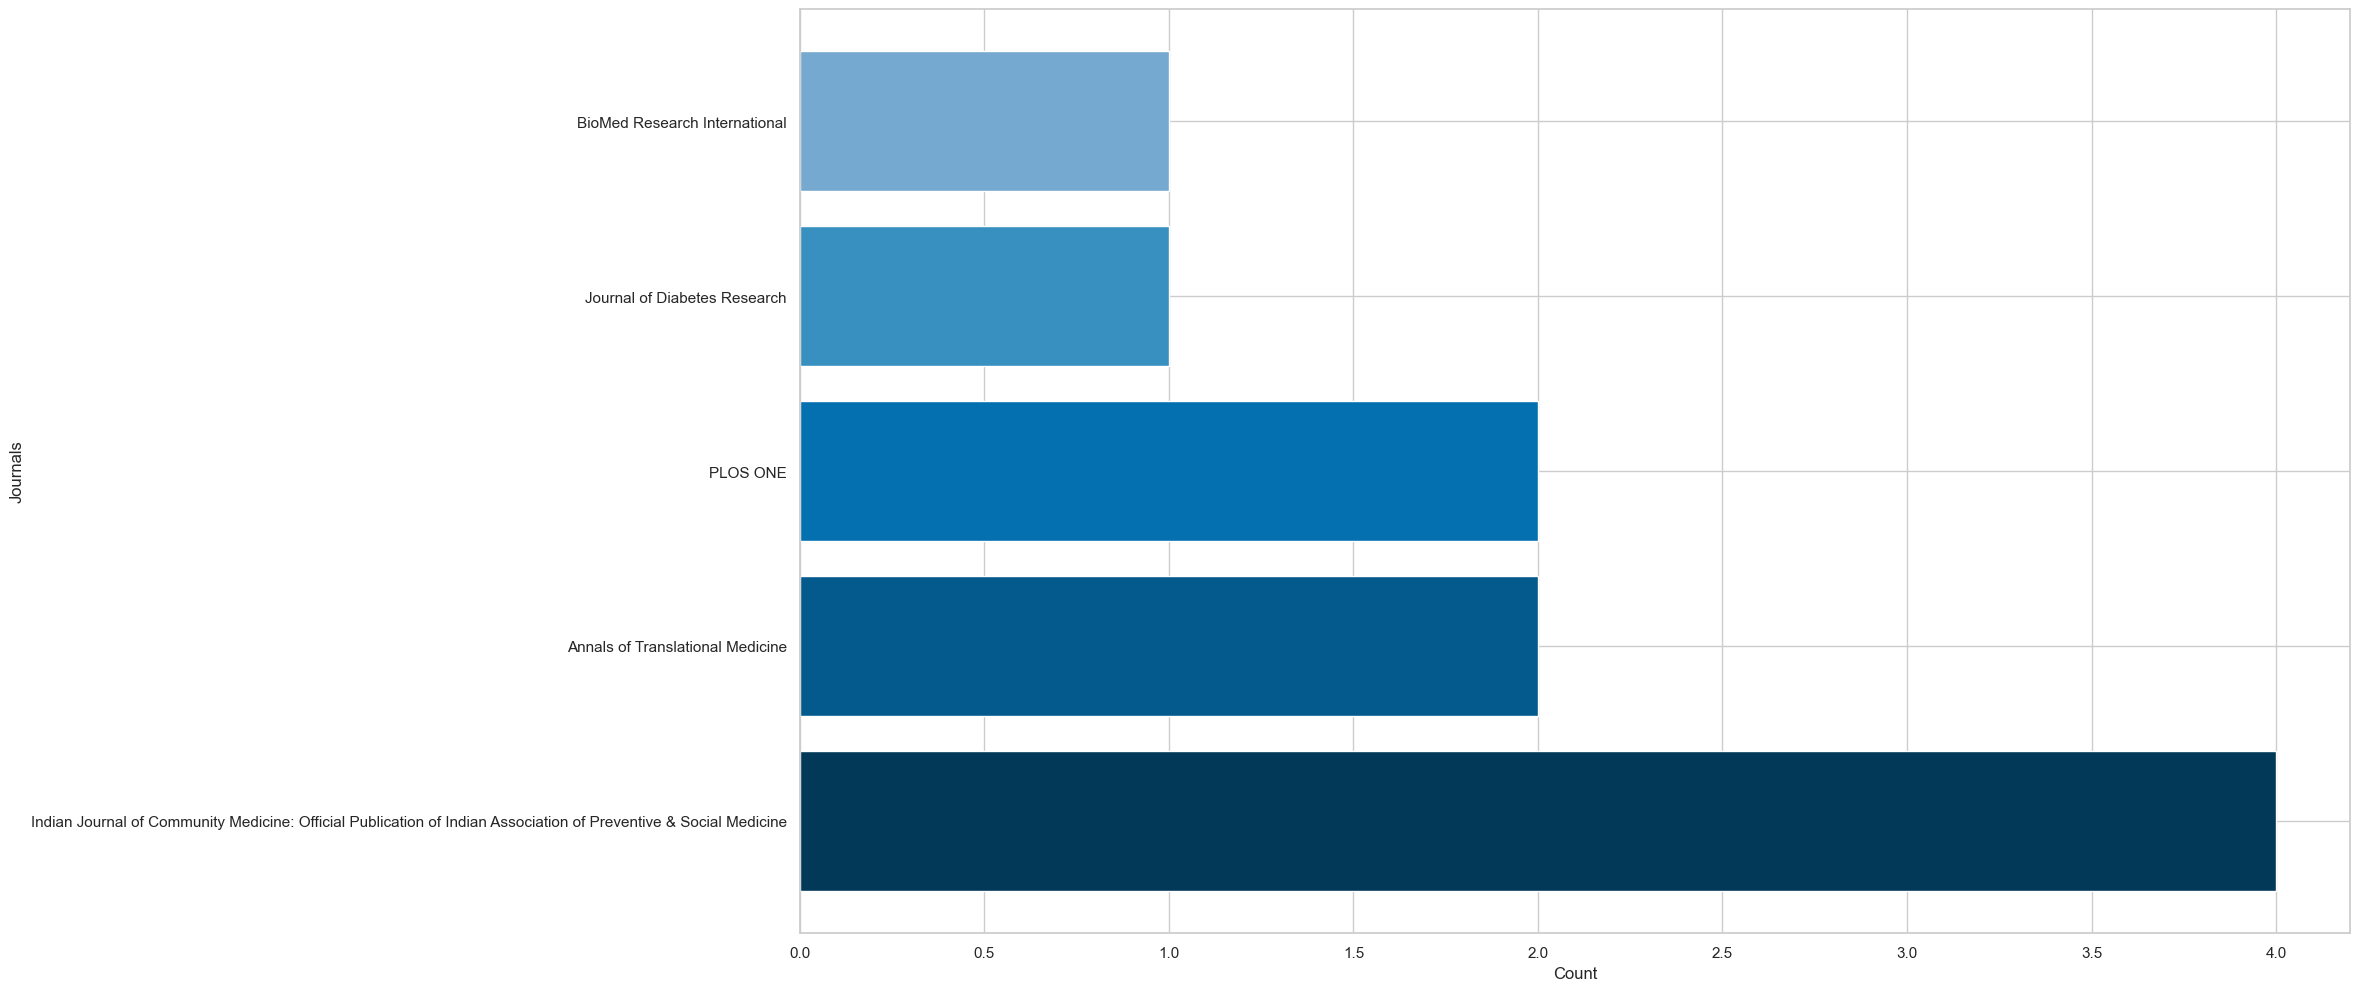

In [185]:
journals = results_df.fulljournalname.value_counts()

sns.set(rc={'figure.figsize':(20,12)})
sns.set_style("whitegrid")
gcolors = plt.cm.PuBu_r(np.linspace(0, 0.5, len(journals)))
plt.barh(journals.index, journals, align="center", color=gcolors, tick_label=(journals.index))
plt.xlabel('Count')
plt.ylabel('Journals')
plt.show()

## Named Entity Recognition (NER)  IN BIOMEDICAL DOMAIN

The named entity linking technique detects relevant concepts in the text and tries to map them to the target knowledge base. In the biomedical domain, some of the target knowledge bases are: BERN API of BioBERT, NCBI, UMLS, Gene Ontology, MESH, ChEMBL, OMIM, ENSEMBL and others. 

#### 1. Spacy models via en_ner_bc5cdr_md, en_ner_bionlp13cg_md

In [186]:
# from scispacy.abbreviation import AbbreviationDetector
# from scispacy.linking import EntityLinker
# import spacy_streamlit

# doc, abbr_df, eents_df = spacyNER(results_df.fulltext[0])

In [187]:
# from spacy_streamlit import visualize_parser
# visualize_parser(doc)

In [188]:
# from copy import deepcopy
# paper = results_df.fulltext[0]
# nlp = en_ner_bionlp13cg_md.load()
# # nlp.max_length = 14942928

# nlp.add_pipe('abbreviation_detector')
# docs = nlp(paper)
# new_text = ''

# en = spacy.load('en_ner_bionlp13cg_md')
# sw_spacy = en.Defaults.stop_words

# abbrv = {str(abrv): str(abrv._.long_form) for abrv in docs._.abbreviations if len(str(abrv._.long_form))>2}
# for abrv in docs._.abbreviations:
#     text = str(abrv.sent)
#     # print('text: ', text)
#     try:
#         abrvEntspan = re.search(abrv.text, text).span()
#         start = text[:abrvEntspan[0]]; end = text[abrvEntspan[1]:]; ab = str(abrv._.long_form)
#         if ab not in text:
#             new_text += f' {start} {ab} {end}'
#         else:
#             new_text += f' {text} '
#         # print()
#         # print('str(abrv._.long_form): ',str(abrv._.long_form))
#         # print()
#         # print('new_text: ', new_text)
#         # print()
#     except ValueError as e:
#         print(e)
# # print(new_text)

# print(len(abbrv))

In [189]:
# print((abbrv))

In [190]:
# import difflib
# def similarity_percentage(word1, word2):
#     seq = difflib.SequenceMatcher(None, word1, word2)
#     return round(seq.ratio() * 100, 2)


# nlp = spacy.load('en_ner_bionlp13cg_md')
# nlp.add_pipe("scispacy_linker", config={"linker_name": "umls", "max_entities_per_mention": 6})
# doc = nlp(paper)
# linker = nlp.get_pipe("scispacy_linker")
# entity_list = []
# new_text = ''
# for i in range(len(doc.ents)):
#     entity = doc.ents[i]
#     sents = str(entity.sent)
#     print((entity.text, sents))
#     try:
#         textEntspan = (re.search(entity.text, sents)).span()
#         for kb_entry in entity._.kb_ents:
#             cui, score_ = kb_entry
#             linkd_kb_entry = linker.kb.cui_to_entity[cui]
#             old = str(entity.text); new = linkd_kb_entry.canonical_name
#             if new.lower() != old.lower():
#                 print(f'{old}, {new}: {similarity_percentage(old, new)}\n')
#                 start = text[:textEntspan[0]]; end = text[textEntspan[1]:]; ab = new
#                 new_text += f' {start} {ab} {end}'
#             else:
#                 new_text += f' {text} '
#                 entity_list.append([entity.text, textEntspan, cui, score_, linkd_kb_entry.canonical_name, linkd_kb_entry.definition, sents])
#     except ValueError as e:
#         print(e)
#         break
#     continue

In [191]:
# # doc = nlp(paper)
# # linker = nlp.get_pipe("scispacy_linker")
# entity_list = []
# for i in range(len(doc.ents)):
#     entity = doc.ents[i]
#     sents = str(entity.sent)
#     textEntspan = re.search(entity.text, sents)

#     if textEntspan is not None:
#         textEntspan = textEntspan.span()

#     entity_dict = {cui: linker.kb.cui_to_entity[cui] for entity in doc.ents for cui, _ in entity._.kb_ents}
#     entity_list = [(entity.text, re.search(entity.text, str(entity.sent)).span(), cui, score_, 
#             entity_dict[cui].canonical_name, entity_dict[cui].definition, str(entity.sent))
#             for entity in doc.ents
#             for cui, score_ in entity._.kb_ents]
# entity_list

In [192]:
# nlp.add_pipe("scispacy_linker", config={"linker_name": "umls", "max_entities_per_mention": 6})
# doc = nlp(paper)
# linker = nlp.get_pipe("scispacy_linker")
# entity_list = [[entity.text, re.search(entity.text, str(entity.sent)).span(), cui, score_, linker.kb.cui_to_entity[cui].canonical_name, linker.kb.cui_to_entity[cui].definition, str(entity.sent)]
#                for entity in doc.ents
#                for cui, score_ in entity._.kb_ents]
# print(entity_list)

In [193]:
# import re
# paper = results_df.fulltext[0]
# nlp = en_ner_bionlp13cg_md.load()
# nlp.add_pipe('abbreviation_detector')
# docs = nlp(paper)
# abbrv = {abrv: str(abrv._.long_form) for abrv in docs._.abbreviations}
# new_text = ''
# for abrv in docs._.abbreviations:
#     text = str(abrv.sent)
#     abrv_ent_span = re.search(re.compile(abrv.text), text).span()
#     start, end = text[:abrv_ent_span[0]], text[abrv_ent_span[1]:]
#     ab = abbrv[abrv]
#     new_text += f' {start} {ab} {end}'
# print(new_text)

In [194]:


# def Entity_linker(paper, linker_name):
#     '''
#     return type: list
#     '''
#     nlp = en_ner_bionlp13cg_md.load()
#     nlp.max_length = 14942928
#     nlp.add_pipe("scispacy_linker", config={"linker_name": linker_name, "max_entities_per_mention": 6})
#     doc = nlp(paper)
#     linker = nlp.get_pipe("scispacy_linker")
#     entity_list = []
#     for i in range(len(doc.ents)):
#         entity = doc.ents[i]
#         sents = str(entity.sent)
#         try:
#             textEntspan = re.search(entity.text, sents).span()
#         except:
#             textEntspan = None
#         for kb_entry in entity._.kb_ents:
#             cui, score_ = kb_entry
#             # look up the CUI in the linker.kb.cui_to_entity dictionary 
#             # using the CUI as the key
#             linkd_kb_entry = linker.kb.cui_to_entity[cui]
#             try:
#                 # print([entity.text, cui, score_, linkd_kb_entry.canonical_name, linkd_kb_entry.definition])
#                 entity_list.append([entity.text, textEntspan, cui, score_, linkd_kb_entry.canonical_name, linkd_kb_entry.definition, sents])

#             except ValueError:
#                 pass
#             break
#         continue
#     columns = ["Entity", "Textspan", "CUI_ID", "Score", "Ent_kb_name", "Ent_definition", 'Text']
#     df = pd.DataFrame(entity_list, columns = columns)
#     return df


In [195]:
# To view the named Entities and spans in texts
# displacy.render(doc, style="ent", options=get_entity_options(random_colors=True))

In [196]:
# # The entities in the papaer sorted by type
# eents_df.sort_values(by='Label', ascending=False, ignore_index=True) 
# u_e_all = eents_df.drop_duplicates(subset='Entity', ignore_index=True, keep='first') 
# print(f'There are {u_e_all.shape[0]} unique entities')
# u_e_all

In [197]:
# abbr_df

In [198]:
# # The abbrevations in the paper 


# #Abbrevations that are not presently in the entities
# abbr_df[~abbr_df.OriginalForm.isin(eents_df.Entity)]

# u_e_abr = abbr_df[~abbr_df.OriginalForm.isin(eents_df.Entity)].drop_duplicates(subset='OriginalForm', ignore_index=True, keep='first') 
# print(f'There are {u_e_abr.shape[0]} unique abbrevated entities')
# u_e_abr

The Linkers compares each identified entity to entries in the knowledge base using a nearest neighbor search. Available linkers :
- Unified Medical Language System (umls), 
- Medical Subject Headings (mesh), 
- RxNorm Ontology (rxnorm), 
- Gene Ontology (go), 
- Human Phenotype Ontology (hpo).


In [199]:
# linker =  'umls'
# umls_df = Entity_linker(paper, linker_name = linker) 
# u_e_umls = umls_df.drop_duplicates(subset = 'CUI_ID', keep='first', ignore_index=True)
# print(f'There are {u_e_umls.shape[0]}  {linker} uniquely mapped entities')
# umls_df

In [200]:
# linker = 'go'
# go_df = Entity_linker(paper, linker_name = linker) 
# u_e_go = go_df.drop_duplicates(subset = 'CUI_ID', keep='first', ignore_index=True)
# print(f'There are {u_e_go.shape[0]} {linker} uniquely mapped entities')
# go_df

In [201]:
# linker = 'mesh'
# mesh_df = Entity_linker(paper, linker_name = linker) 
# u_e_mesh = mesh_df.drop_duplicates(subset = 'CUI_ID', keep='first', ignore_index=True)
# print(f'There are {u_e_mesh.shape[0]} {linker} uniquely mapped entities')
# mesh_df

In [202]:
# Not much results generated
# linker = 'hpo'
# hpo_df = Entity_linker(paper, linker_name = linker) 
# u_e_hpo = hpo_df.drop_duplicates(subset = 'CUI_ID', keep='first', ignore_index=True)
# print(f'There are {u_e_hpo.shape[0]} {linker} uniquely mapped entities')
# hpo_df

In [203]:
# # Not much results generated
# linker = 'rxnorm'
# rxnorm_df = Entity_linker(paper, linker_name = linker) 
# u_e_rx = rxnorm_df.drop_duplicates(subset = 'CUI_ID', keep='first', ignore_index=True)
# print(f'There are {u_e_rx.shape[0]} {linker} uniquely mapped entities')
# rxnorm_df

In [204]:
# u_e_all.shape[0], u_e_abr.shape[0], u_e_umls.shape[0], u_e_go.shape[0], u_e_hpo.shape[0], u_e_mesh.shape[0], u_e_rx.shape[0]

In [205]:
# merged1 = pd.concat([umls_df, mesh_df, go_df, hpo_df, rxnorm_df], keys=['umls', 'mesh', 'go', 'hpo', 'rx'])

# merged1.drop_duplicates(subset = ['Ent_kb_name', 'Textspan'], keep='first', inplace=True)
# merged1

In [206]:
# merged2 = pd.merge(eents_df, merged1, on = ['Entity', 'Textspan', 'Text'], how='outer')
# merged2

In [207]:
# merged3 = merged2.groupby(['Entity','Textspan', 'Text', 'Label', 'DocSpan']).agg(tuple).applymap(list).reset_index()
# merged3

In [208]:
# merged3[['Score', 'CUI_ID', 'Ent_kb_name', 'Ent_definition']] = merged3[['Score', 'CUI_ID', 'Ent_kb_name', 'Ent_definition']].apply(maplist)
# merged3.fillna(0, inplace=True)
# merged3

In [209]:
# abbr_df[['Entity', ]]

In [210]:
# abbr_df

Some of the Named Entity Recognition (NER) Model identified entities with high ambiguity while some good ones are limited in term of the number of entities identified. [details](https://allenai.github.io/scispacy/)



|model		   | Entity Types|
| -- |-- |
|en_ner_craft_md|  GGP, SO, TAXON, CHEBI, GO, CL|
|en_ner_jnlpba_md|  DNA, CELL_TYPE, CELL_LINE, RNA, PROTEIN|
|en_ner_bc5cdr_md|	DISEASE, CHEMICAL|
|en_ner_bionlp13cg_md|	AMINO_ACID, ANATOMICAL_SYSTEM, CANCER, CELL, CELLULAR_COMPONENT, DEVELOPING_ANATOMICAL_STRUCTURE, GENE_OR_GENE_PRODUCT, IMMATERIAL_ANATOMICAL_ENTITY, MULTI-TISSUE_STRUCTURE, ORGAN, ORGANISM, ORGANISM_SUBDIVISION, ORGANISM_SUBSTANCE, PATHOLOGICAL_FORMATION, SIMPLE_CHEMICAL, TISSUE|



#### 2. BioBERT via BERN2 API

In [240]:
import requests
import time
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()



from itertools import islice

DESCRIPTION = 'KnowledgeGraph'
NODENORM_URL = 'https://nodenormalization-sri.renci.org/get_normalized_nodes'
NAME_RESOLUTION_URL = 'https://name-resolution-sri.renci.org/lookup'
PLAIN_URL = 'http://bern2.korea.ac.kr/plain'
from transformers import pipeline
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
zero_shot_classifier = pipeline("zero-shot-classification", device=device)



def normalize(il):
    input = {'curies': il}
    results = requests.post(NODENORM_URL, json=input)
    return results.json()

def rearrange_dict(input_dict):
    output_dict = {}
    id_dict = input_dict[next(iter(input_dict))]
    output_dict['entity_id'] = id_dict['id']['identifier']
    output_dict['entity_label'] = id_dict['id'].get('label', '')
    equivalent_identifiers = set(id.get('identifier', '') for id in id_dict['equivalent_identifiers'])
    equivalent_labels = set(id.get('label', '') for id in id_dict['equivalent_identifiers'] if id.get('label', ''))
    output_dict['equivalent_identifiers'] = [id_dict['id']['identifier']] + list(
        equivalent_identifiers - {id_dict['id']['identifier']})
    output_dict['equivalent_labels'] = list(equivalent_labels - {output_dict['entity_label']})
    output_dict['entity_type'] = id_dict['type']
    return output_dict

def resolve_name(query):
    response = requests.post(f"{NAME_RESOLUTION_URL}?string={query}&offset=0&limit=1000").json()
    if any(query.lower() in s.lower() for v in response.values() for s in v):
        keys = (k for k, v in response.items() if any(query.lower() == s.lower() for s in v))
        keys = list(islice(keys, 10))  # limit the number of items returned to 10
        if keys:
            return rearrange_dict(normalize(keys))
    else:
        return None

def send_post_request(payload, timeout=30, retries=1):
    """
    Sends a POST request to the specified URL with the given payload.
    If the request times out, retries up to the specified number of times
    with an exponential backoff strategy.

    Args:
        url (str): The URL to send the POST request to.
        payload (str): The payload to include in the POST request (must be less than 5000 characters).
        timeout (int): The timeout limit for the request (in seconds). Default is 30 seconds.
        retries (int): The maximum number of retries to attempt. Default is 3 retries.

    Returns:
        The server response, or None if all retries failed.
    """
    responses = []
    if len(payload) > 5000:
        # print("Payload is too long. Splitting into smaller chunks...")
        chunks = [payload[i:i + 5000] for i in range(0, len(payload), 5000)]
    else:
        chunks = [payload]

    for i, chunk in enumerate(chunks):
        for j in range(retries):
            try:
                response = requests.post(PLAIN_URL, json={"text": chunk}, timeout=timeout, verify=False)
                if response.ok:
                    responses.append(response.json())
                    break
                else:
                    print(f"Request failed with status code {response.status_code}. Retrying...")
            except requests.exceptions.Timeout:
                if j == retries - 1:
                    print("All retries failed. Request timed out.")
                    return None
                else:
                    print(f"Request timed out. Retrying in {2 ** j} seconds...")
                    time.sleep(2 ** j)
            except requests.exceptions.RequestException as e:
                print(f"An error occurred: {e}")
                return None

        if i < len(chunks) - 1:
            time.sleep(1)  # Add a delay between chunk requests to avoid overwhelming the server
    return responses

def parse_post_request(payload):
    if isinstance(payload, str):
        responses = send_post_request(payload, timeout=30, retries=1)
    if isinstance(payload, list):
        responses = []
        for payld in payload:
            responses.extend(send_post_request(payld, timeout=30, retries=1))

    resp = json.dumps(responses, indent = 4)
    with open('responses1.json', "w+") as f:
        f.write(resp)
    print('send_post_request done!')
    return parse_entities(responses)

def parse_entities(responses):
    id_name_mapping = {}
    parsed_entities = []
    for ix, entities in enumerate(responses):
        text = entities['text']
        e = []
        if not entities.get('annotations'):
            parsed_entities.append({'text': text, 'timestamp': entities['timestamp'],
                                    'text_sha256': hashlib.sha256(text.encode('utf-8')).hexdigest()})
            continue
        for entity in entities['annotations']:
            entity_type = entity['obj']
            entity_name = entity['mention']
            entity_proba = entity['prob']
            try:
                entid = entity['id']
                if len(entid) < 1:
                    entity_id = entity_name
                elif len(entid) == 1:
                    entity_id = entid[0]
                else:
                    entity_id = ''.join(entid)
                id_name_mapping[entity_id] = entity_name
            except IndexError:
                entity_id = entity_name
            if entity_name not in id_name_mapping.values(): 
                # print(entity_name) 
                new_entity_name = id_name_mapping.get(entity_id) 
                text = text.replace(entity_name, new_entity_name)
                # print('new text: ', text)
                entity_name = new_entity_name 
            else:
                entity_name = entity_name
            
            temp = resolve_name(entity_name)
            if temp:
                if entity_id not in temp['equivalent_identifiers']:
                    temp['equivalent_identifiers'].append(entity_id)
                    temp['entity_type'].append(entity_type)
                    temp.update({'entity_proba': entity_proba})
                else:
                    temp['equivalent_identifiers'].append(entity_id)
                    temp['entity_type'].append(entity_type)
                    temp.update({'entity_proba': entity_proba})
            else:
                temp = {'entity_id': entity_id, 'equivalent_identifiers': [], 'equivalent_labels': [],
                        'entity_type': entity_type, 'entity_label': entity_name, 'entity_proba': entity_proba}
            e.append(temp)
        parsed_entities.append({'entities': e, 'text': text, 'triples': get_triples(e, text),
                                'text_sha256': hashlib.sha256(text.encode('utf-8')).hexdigest()})
        print(f'response: {ix} done')
    qry = json.dumps(parsed_entities, indent = 4)
    with open('parsed_entity1.json', "w+") as f:
        f.write(qry)
    return parsed_entities

def get_p_relation(paper):
    doc = EN(paper)
    # Matcher class object
    matcher = Matcher(doc.vocab)
    spans = []
    # define the rule
    rule = [{'DEP': 'ROOT'},
        {'DEP': 'prep', 'OP': "?"},
        {'DEP': 'agent', 'OP': "?"},
        {'POS': 'VERB', 'OP': "?"},
        {'POS': 'VERB','OP': "?"}, 
        {'DEP': 'prt', 'OP': "?"}, 
        {'DEP': 'prep','OP': "?"}, 
        {'POS': 'ADV','OP': "?"},
        {'POS': 'PART','OP': "?"}]

    matcher.add("matching", [rule], on_match=None)
    matches = matcher(doc)
    for _, start, end in matches:
        span = doc[start:end]  # The matched span
        spans.append(span.text)
    return spans

def sent_and_ents(ents, input_string):
    sentences = input_string.split(". ")
    matched_sentences = []
    for sentence in sentences:
        if ents[0] in sentence and ents[1] in sentence:
            matched_sentences.append(sentence)
    if matched_sentences:
        return(matched_sentences)

def get_triples(entities, text):
    id_list = [entity['entity_id'] for entity in entities]
    label_list = [entity['entity_label'] for entity in entities]

    id_pairs = [[id_list[i], id_list[i+1]] for i in range(len(id_list)-1)]
    label_pairs = [[label_list[i], label_list[i+1]] for i in range(len(label_list)-1)]
 
    triples = []
    for k, item in enumerate(label_pairs):
        # texts = sent_and_ents(item, textss)
        # if texts:
        item1  = item[0]
        item2 = item[1]
        start_idx = text.find(item1)
        end_idx = text.find(item2) + len(item2)
        if start_idx != -1 and end_idx != -1:
            subsentence = text[start_idx:end_idx].strip()
            rels  = get_p_relation(subsentence)
            if not rels:
                triples.append({'subject':id_pairs[k][0], 'predicate': 'relations', 'object': id_pairs[k][1]})
            else:
                candidate_rel = [lemmatizer.lemmatize(rel, pos=wordnet.VERB) if wordnet.synsets(rel, pos=wordnet.VERB) else 'relation' for rel in rels]
                if len(candidate_rel)>1:
                    for rel in candidate_rel:
                        triples.append({'subject':id_pairs[k][0], 'predicate': rel, 'object': id_pairs[k][1]})
                    # print('rel>1,', item, candidate_rel)
                    # sequence = [f"{text} {label}" for label in candidate_rel]
                    # # Classify the sequence of candidate labels
                    # results = zero_shot_classifier(sequence, candidate_rel)
                    # # Extract the top relation label` `   
                    # predicted_label = results[0]
                    # triples.append({'subject':id_pairs[k][0], 'predicate': predicted_label['labels'], 'object': id_pairs[k][1]})
                else:
                    triples.append({'subject':id_pairs[k][0], 'predicate': candidate_rel[0], 'object': id_pairs[k][1]})

    return triples



No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [496]:
import re

# Define the correct term
tx ='Coronary heart disease (CHD-10) myocardial ischemic hypoxic disease caused narrowing blockage coronary arteries, featured high morbidity, high mortality youthfulness . \
    According American Heart Association, number deaths cardiovascular disease worldwide expected exceed 23.6 million 2030, economic burden cardiovascular disease exceed $1 trillion . \
    The prevalence CHD young middle-aged people, morbidity mortality rates, economic cost issues follow, increasing years, according domestic international studies .Percutaneous coronary intervention (PCI) percutaneous puncture technique deliver balloon catheter related device relieve coronary artery stenosis obstruction reestablish coronary blood flow, treatment clinical high-risk patients (acute coronary syndromes, medical comorbidities, etc.) variety complex coronary lesions, widely utilized clinical practice . \
    Depending timing procedure degree urgency onset CHD-23, PCI divided emergency PCI elective PCI . \
    For patients stable coronary heart disease, PCI electively performed detailed preoperative evaluation preparation. \
    Emergency PCI suitable patients acute coronary syndromes time window procedure. Relevant data revealed total number PCI mainland China 2018 915,256 cases, average number cases million population China 2018 651 . \
    Regardless PCI procedure, improve long-term survival, quality life, lessen clinical symptoms related myocardial ischemia individuals CHD. Naturally, involves people CHD young middle-aged increased survival PCI. \
    So, need concerned group people.The young middle-aged population special important social, family life responsibilities, growing number young middle-aged patients CHD-32 aspire return work regain social role PCI . Returning work means patients return previous jobs accept new paid jobs, important improving patients quality life achieving self-worth, important indicators disease recovery . A study 3291 patients CHD 24 European countries found 76% patients return work 6 months 3 years discharge . \
    A prospective cohort study carried Norwegian scholars found approximately 89% patients returned work 3 years PCI . The results questionnaire survey conducted Wang 428 patients 3 years PCI revealed 5.7% patients unable work health problems work, 58.8% patients significant decrease work level needed reduce work hours . An investigation 1165 patients treated PCI 21 provinces China found 55.9% patients returned work 1 year acute myocardial infarction . \
    It seen that, compared data returning work abroad, rate return work young middle-aged patients CHD China relatively low. With trend younger onset CHD improvement survival rate China, young middle-aged patients CHD population needs paid attention returning work. Thus, important understand factors affecting patients return work following PCI action benefits return work.The process returning workforce complex multidimensional, previous studies validated influencing variables predictors returning work PCI. \
    The cardio-related factors (left ventricular ejection fraction, exercise capacity, treatment/procedural factors, rhythm stability, existing comorbidities, etc.), psychosocial factors (work stress, anxiety, depression, dual work life stress, etc.), work-related factors (work intensity, work environment, etc.) related patients CHD returning work reviewed paper . According research Warraich, readmission year following myocardial infarction, baseline smoking, hypertension, post-discharge bleeding linked negative changes employment . \
    In addition, Stendardos study pointed strongest predictors return work 1 year discharge acute myocardial infarction related social, psychological, occupational factors education, employment status, depression clinical parameters . According findings Worcester, variables related return work include rate people participate cardiac rehabilitation, length hospital stays, previous angina, performing manual labor physically demanding jobs, job satisfaction .Only small number research China investigated variables affect patients CHD going work. \
    A survey showed type disease, ejection fraction, gender, nature work, fatigue, return-to-work self-efficacy, family function related patients return-to-work 3 months discharge . Another investigation additionally showed interventional therapy, intraoperative postoperative complications, cardiac function, fear disease progression, social support level factors affected patients early-onset (<45 years old) coronary heart diseases action return work interventional therapy . Since significantly different laws, cultural norms, policy supports different nations regard returning work, currently standardized guidelines policies reintegrating CHD patients profession, stronger evidence required argue look variables affecting patients getting work.However, research papers published China factors influencing return work PCI young middle-aged patients. \
    So, study aimed explore factors influencing return work PCI young middle-aged patients CHD, offer reference basis constr',


# Define a pattern that matches the incorrect terms

# Find all matches of the pattern in the text
matches = re.findall(pattern, text)

# Print the matches
print(matches)


None


In [243]:
gg = open('covid.json')
gt = json.load(gg)
dd = [kk[0] for kk in gt.values()]
print(len(dd))
results_df = pd.DataFrame.from_dict(dd, orient='columns')



10


In [318]:
gg = open('responses1.json')
responses = json.load(gg)

parse = parse_entities(responses)

response: 0 done
response: 1 done
response: 2 done
response: 3 done
response: 4 done
response: 5 done
response: 6 done
response: 7 done
response: 8 done
response: 9 done
response: 10 done
response: 11 done
response: 13 done
response: 14 done
response: 15 done
response: 16 done
response: 17 done
response: 18 done
response: 19 done
response: 20 done
response: 21 done
response: 22 done
response: 23 done
response: 24 done
response: 25 done
response: 26 done
response: 27 done
response: 28 done
response: 29 done
response: 30 done
response: 31 done
response: 32 done
response: 33 done
response: 34 done
response: 35 done
response: 36 done
response: 37 done
response: 38 done
response: 39 done
response: 40 done
response: 41 done
response: 43 done
response: 44 done
response: 45 done
response: 46 done
response: 47 done
response: 48 done
response: 49 done
response: 50 done
response: 51 done
response: 52 done
response: 53 done
response: 54 done
response: 55 done
response: 56 done
response: 57 done
re

In [ ]:
# dataset = make_df(parsed)
# dataset.drop_duplicates(subset = 'entity', ignore_index=True)

In [426]:
cd = {
  'biolink:PopulationOfIndividualOrganisms': '#00FF00',
  'biolink:OrganismalEntity': '#9370DB',
  'biolink:Entity': '#FF00FF',
  'biolink:SubjectOfInvestigation': '#C0C0C0',
  'biolink:ThingWithTaxon': '#800080',
  'biolink:Cohort': '#008000',
  'biolink:NamedThing': '#808080',
  'biolink:StudyPopulation': '#0000FF',
  'biolink:Disease': '#FF0000',
  'biolink:BiologicalEntity': '#FFC0CB',
  'biolink:DiseaseOrPhenotypicFeature': '#FFD700',
  'biolink:ChemicalEntity': '#008000',
  'biolink:ChemicalMixture': '#3CB371',
  'biolink:MolecularEntity': '#00FF00',
  'biolink:Gene': '#00FF11',
  'gene': '#00FF11',
  'biolink:Drug': '#006400',
  'drug': '#006400',
  'biolink:Polypeptide': '#FFA500',
  'biolink:AnatomicalEntity': '#4B0082',
  'biolink:GenomicEntity': '#9371DB',
  'biolink:BiologicalProcess': '#4B0084',
  'species': '#C2F0C2',
  'DNA': '#90EE90',
  'disease': '#FF0000',
  'RNA': '#A52A2A',
  'biolink:biolink:PlanetaryEntity': '#FF0000',
  'biolink:CellLine': '#FF0000',
  'cell_line': '#FF0000',
  'cell_type': '#FF0000',
  'biolink:Mutation': '#00FF13',
  'mutation':'#00FF13',
  'biolink:InformationContentEntity':'#008000',
  'biolink:AdministrativeEntity':'#008001'
}


In [432]:
cd = {
  'biolink:PopulationOfIndividualOrganisms': '#00FF00',
  'biolink:OrganismalEntity': '#9370DB',
  'biolink:Entity': '#FF00FF',
  'biolink:SubjectOfInvestigation': '#C0C0C0',
  'biolink:ThingWithTaxon': '#800080',
  'biolink:Cohort': '#008000',
  'biolink:NamedThing': '#808080',
  'biolink:StudyPopulation': '#0000FF',
  'biolink:Disease': '#FF0000',
  'biolink:BiologicalEntity': '#FFC0CB',
  'biolink:DiseaseOrPhenotypicFeature': '#FF0001',
  'biolink:ChemicalEntity': '#008000',
  'biolink:ChemicalMixture': '#3CB371',
  'biolink:MolecularEntity': '#00FF00',
  'biolink:Gene': '#00FF12',
  'gene': '#00FF12',
  'biolink:Drug': '#006400',
  'drug': '#007700',
  'biolink:Polypeptide': '#FFA500',
  'biolink:AnatomicalEntity': '#4B0082',
  'biolink:GenomicEntity': '#9371DB',
  'biolink:BiologicalProcess': '#4B0084',
  'species': '#C2F0C2',
  'DNA': '#90EE90',
  'disease': '#FF1111',
  'RNA': '#00FF22',
  'biolink:PlanetaryEntity': '#FF4444',
  'biolink:CellLine': '#FF7777',
  'cell_line': '#FFAA00',
  'cell_type': '#FFCC00',
  'biolink:Mutation': '#00FF13',
  'mutation':'#00FF44',
  'biolink:InformationContentEntity':'#008000',
  'biolink:AdministrativeEntity':'#008001'
}


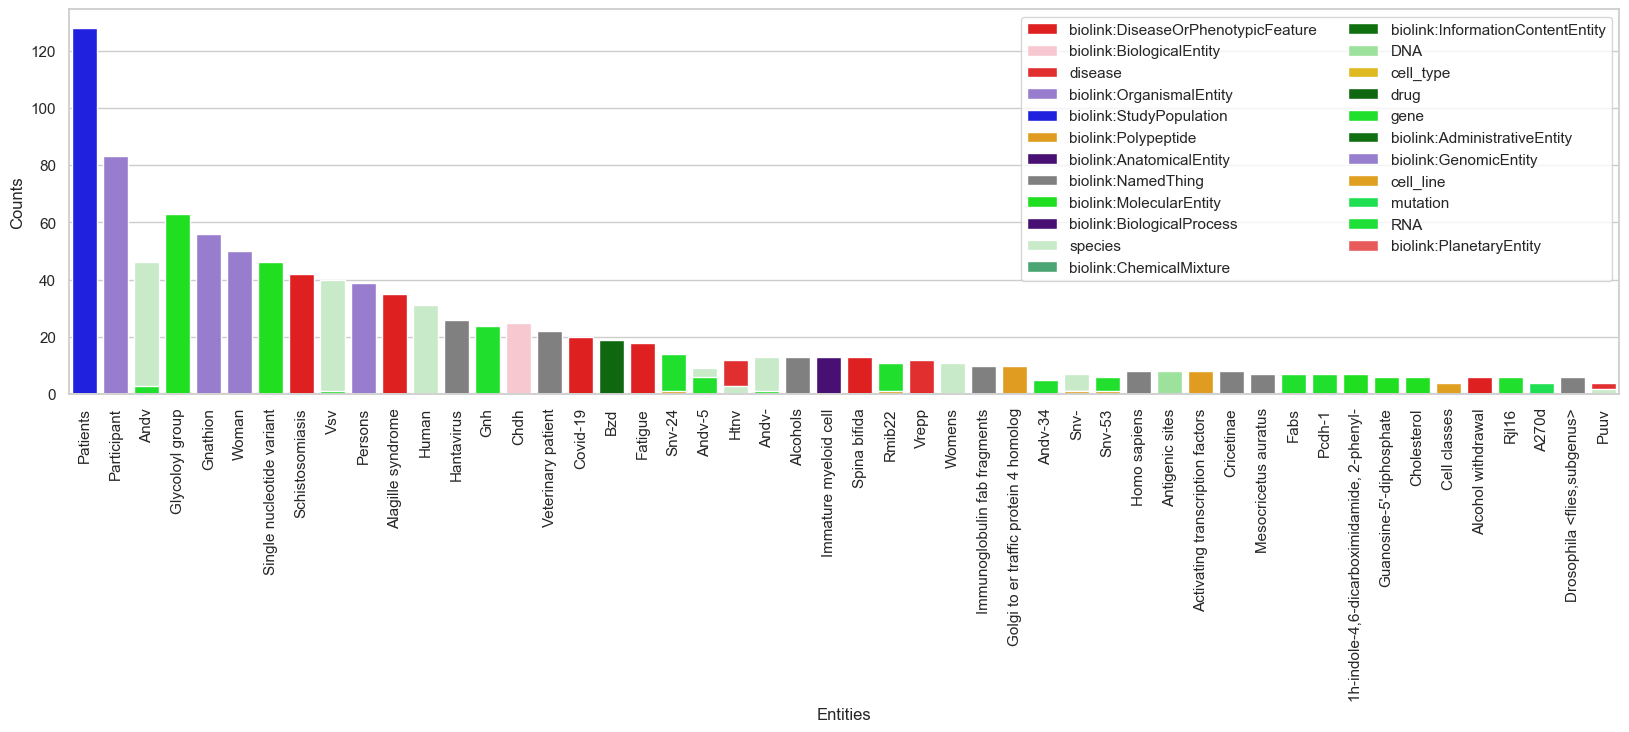

In [433]:
parsed = parse
df = pd.DataFrame([ (''.join([entity['entity_type'][0] if isinstance(entity['entity_type'], list) else entity['entity_type']]), entity['entity_label'].capitalize())
                    for entitie in parsed
                    for entity in entitie.get('entities', []) ],
                  columns=['entity_type', 'entity_label'])

plt.figure(figsize=(20, 5))
x_order = df['entity_label'].value_counts().sort_values(ascending=False).index[:50] # Pick top 20
ax = sns.countplot(x="entity_label", hue="entity_type", dodge=False,
                    order=x_order,
                    data=df, palette=cd)
# for p in ax.patches:
#    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))                   
plt.xticks(rotation=90)
plt.legend(loc='upper right', ncol=2)   # Set ncol=2 to break legend into two columns
plt.xlabel('Entities')
plt.ylabel('Counts')
plt.savefig('Entities Freq Counts Colored by Type.png')


In [252]:
df1 = pd.DataFrame([(entity['subject'].capitalize(), entity['predicate'], entity['object'].capitalize()) for entitie in parsed for entity in entitie['triples']], columns=['subject', 'predicat', 'object'])
df1

,subject,predicat,object
0,Mondo:0100096,relations,Hp:0100749
1,Mondo:0100096,relation,Cui-less
2,Cui-less,relations,Ncit:c146695
3,Mesh:d009202,relations,Umls:c0030705
4,Mondo:0100096,relation,Mondo:0100096
...,...,...,...
590,Umls:c0030705,find,Mim:113620mesh:d019280
591,Umls:c0030705,show,Mim:113620mesh:d019280
592,Umls:c0030705,relation,Mim:113620mesh:d019280
593,Umls:c0030705,relation,Mim:113620mesh:d019280


In some cases, the entity mentioned is present, but there is no good equivalent CUI in UMLS/SNOMED-CT. The entity is then normalized to “CUI-less”.

## Get a structured tabular data for other downstream task

In [126]:
# dataset = make_df(parsed)
# dataset.drop_duplicates(subset = 'entity', ignore_index=True)

## Create Neo4j Instance and Nodes

In [144]:
# from neo4j_conn import Neo4jConn
# host = 'bolt://localhost:7687'
# user = 'neo4j'
# pwd = 'cvdkgisawesome'
# db = Neo4jConn(host, user, pwd)

In [359]:
from neo4j import GraphDatabase, basic_auth

# host = 'bolt://54.174.26.26:7687'
host = 'bolt://localhost:7687'
user = 'neo4j'
pwd = 'Lordpleasehealme'

driver = GraphDatabase.driver(host,auth=(user, pwd))

def cypher_query(query, params=None): 
    with driver.session(database="neo4j") as session:
        results = session.run(query, params)
        return pd.DataFrame([r.values() for r in results], columns=results.keys())
    driver.close()

In [487]:
parsed

[{'entities': [{'entity_id': 'MONDO:0005010',
    'entity_label': 'coronary artery disorder',
    'equivalent_identifiers': ['MONDO:0005010',
     'MEDDRA:10011082',
     'UMLS:C0010054',
     'MEDDRA:10013210',
     'ICD10:I25.10',
     'HP:0001677',
     'SNOMEDCT:413838009',
     'ICD9:410-414.99',
     'MEDDRA:10011099',
     'UMLS:C1956346',
     'ICD10:I25',
     'SNOMEDCT:53741008',
     'MEDDRA:10011079',
     'MESH:D003327',
     'MEDDRA:10049175',
     'SNOMEDCT:414024009',
     'MEDDRA:10011093',
     'MEDDRA:10011081',
     'MESH:D003324',
     'MEDDRA:10011078',
     'MEDDRA:10011076',
     'MEDDRA:10008936',
     'SNOMEDCT:413844008',
     'NCIT:C26732',
     'UMLS:C0264694',
     'MEDDRA:10013098',
     'ICD9:414.0',
     'DOID:3393',
     'MEDDRA:10011087',
     'MEDDRA:10008937',
     'UMLS:C1533195',
     'MEDDRA:10068617',
     'MEDDRA:10011106',
     'ICD10:I20-I25',
     'ICD9:414.9',
     'MEDDRA:10003211',
     'EFO:0001645',
     'UMLS:C0010068',
     'MEDDRA:10

In [355]:
def create_nodes(parsed):
    cypher_query("""
    UNWIND $data as cols
    WITH cols as col
    UNWIND col as row
    MERGE (s:Sentence{id:(row.text_sha256)})
    SET s.text = row.text
    WITH s, row.entities as entities, row
    FOREACH(entity IN entities | 
        MERGE (e:Entity{entity_id:entity.entity_id})
        ON CREATE SET  e.entity_label = entity.entity_label,
                        e.entity_id = entity.entity_id,
                        e.equivalent_identifiers = entity.equivalent_identifiers,
                        e.equivalent_labels = entity.equivalent_labels,
                        e.entity_type = entity.entity_type,
                        e.entity_proba = entity.entity_proba
        MERGE (s)-[m:MENTIONS]->(e)
        FOREACH(triple IN entity.triples |
            MERGE (o:Entity {entity_id: triple.object})
            ON CREATE SET o.entity_id = triple.object, o.entity_label = triple.object_label
            MERGE (s)-[:RELATION {predicate: triple.predicate}]->(o)
        )
    )
    """, 
    {'data': parsed})

#Create labels

cypher_query("""
MATCH (n:Entity)
WITH DISTINCT n.entity_type AS types, collect(DISTINCT n) AS entities
UNWIND types as type
CALL apoc.create.addLabels(entities, 
  CASE 
    WHEN type in ['biolink:DiseaseOrPhenotypicFeature', 'disease'] THEN ['Disease']
    WHEN type in ['biolink:ChemicalSubstance'] THEN ['Chemical']
    ELSE [apoc.text.upperCamelCase(type)]
  END) YIELD node
RETURN *
""")


""


In [ ]:
# MATCH p=()-[r:MENTIONS]->() RETURN *

In [400]:
#Create labels
cypher_query("""
MATCH (n:Entity)
WITH DISTINCT n.entity_type AS types, collect(DISTINCT n) AS entities
UNWIND types as type
CALL apoc.create.addLabels(entities, 
  CASE 
    WHEN type in ['biolink:DiseaseOrPhenotypicFeature', 'disease'] THEN ['Disease']
    WHEN type in ['biolink:ChemicalSubstance'] THEN ['Chemical']
    ELSE [apoc.text.upperCamelCase(type)]
  END) YIELD node
RETURN *
""")

,entities,node,type,types
0,"[(entity_label, entity_type, color, equivalent...","(entity_label, entity_type, color, equivalent_...",biolink:DiseaseOrPhenotypicFeature,"[biolink:DiseaseOrPhenotypicFeature, biolink:B..."
1,"[(entity_label, entity_type, color, equivalent...","(entity_label, entity_type, color, equivalent_...",biolink:DiseaseOrPhenotypicFeature,"[biolink:DiseaseOrPhenotypicFeature, biolink:B..."
2,"[(entity_label, entity_type, color, equivalent...","(entity_label, entity_type, color, equivalent_...",biolink:DiseaseOrPhenotypicFeature,"[biolink:DiseaseOrPhenotypicFeature, biolink:B..."
3,"[(entity_label, entity_type, color, equivalent...","(entity_label, entity_type, color, equivalent_...",biolink:DiseaseOrPhenotypicFeature,"[biolink:DiseaseOrPhenotypicFeature, biolink:B..."
4,"[(entity_label, entity_type, color, equivalent...","(entity_label, entity_type, color, equivalent_...",biolink:DiseaseOrPhenotypicFeature,"[biolink:DiseaseOrPhenotypicFeature, biolink:B..."
...,...,...,...,...
2959,"[(entity_label, entity_type, color, equivalent...","(entity_label, entity_type, color, equivalent_...",DNA,"[biolink:AnatomicalEntity, biolink:OrganismalE..."
2960,"[(entity_label, entity_type, color, equivalent...","(entity_label, entity_type, color, equivalent_...",biolink:NamedThing,"[biolink:NamedThing, biolink:Entity, biolink:D..."
2961,"[(entity_label, entity_type, color, equivalent...","(entity_label, entity_type, color, equivalent_...",biolink:Entity,"[biolink:NamedThing, biolink:Entity, biolink:D..."
2962,"[(entity_label, entity_type, color, equivalent...","(entity_label, entity_type, color, equivalent_...",biolink:Device,"[biolink:NamedThing, biolink:Entity, biolink:D..."


## Querying the Graph

1. Most mentioned ENTITY

In [365]:
cypher_query("""
    MATCH (e:Entity)
    RETURN e.entity_label AS entity,
            e.entity_type as object_type,
           size((e)<-[:MENTIONS]-()) AS mentions
    ORDER BY mentions
    DESC LIMIT 10
    """)
# entities

,entity,object_type,mentions
0,COVID,species,38
1,Persons,"[biolink:OrganismalEntity, biolink:BiologicalE...",19
2,human,species,16
3,Veterinary Patient,"[biolink:NamedThing, biolink:Entity, biolink:O...",12
4,Participant,"[biolink:OrganismalEntity, biolink:BiologicalE...",11
5,Patients,"[biolink:StudyPopulation, biolink:PopulationOf...",10
6,COVID-19,"[biolink:DiseaseOrPhenotypicFeature, biolink:B...",10
7,Single Nucleotide Variant,"[biolink:MolecularEntity, biolink:ChemicalEnti...",9
8,glycoloyl group,"[biolink:MolecularEntity, biolink:ChemicalEnti...",9
9,Gn Gc,gene,8


2. ENTITY CoCCURENCE

In [ ]:
# dataset = make_df(parsed)
# dataset.drop_duplicates(subset = 'entity', ignore_index=True)

In [366]:
cypher_query("""
            MATCH (e1:Entity)<-[:MENTIONS]-()-[:MENTIONS]->(e2:Entity)
            WHERE id(e1) < id(e2)
            RETURN e1.entity_label as entity1, e2.entity_label as entity2, count(*) as cooccurrence
            ORDER BY cooccurrence DESC
            """)
# cooccurence

,entity1,entity2,cooccurrence
0,COVID,human,13
1,COVID,ANDV,10
2,COVID,Single Nucleotide Variant,9
3,Single Nucleotide Variant,ANDV,9
4,Single Nucleotide Variant,glycoloyl group,9
...,...,...,...
12372,TCF15,Rift Valley fever vaccine,1
12373,ANDV-5,Rift Valley fever vaccine,1
12374,Broadly Neutralizing Antibodies,Rift Valley fever vaccine,1
12375,Single Nucleotide Variant,Rift Valley fever vaccine,1


3.  ENTITY Mention across sentences for a singular entity

In [367]:
# Find sentences that mention a specific medical entity.

cypher_query("""
            MATCH (e:Entity)<-[:MENTIONS]-(s:Sentence)
            WHERE e.entity_label = "Patient"
            RETURN s.text as sentence,
            e.entity_label as entity_searched,
            e.entity_type as object_type
            """)
# search_query

,sentence,entity_searched,object_type


### PathFinding

In [ ]:

# f = graph.run('''
#           CALL apoc.export.graphml.all(null, {stream:true})
# YIELD file, nodes, relationships, properties, data
# RETURN file, nodes, relationships, properties, data;
#           ''')
# graphdata = f.to_data_frame()
# graphdata.data

In [255]:
# # What kind of nodes exist  
# nodesinf = graph.run('''MATCH (n) 
#         // Sample some nodes, reporting on property and relationship counts per node.
#         // WHERE rand() <= 0.1 
#         RETURN DISTINCT labels(n) as Classes, count(*) AS ClassSize, 
#         avg(size(keys(n))) AS Avg_PropertyCount, 
#         min(size(keys(n))) AS Min_PropertyCount, 
#         max(size(keys(n))) AS Max_PropertyCount, 
#         avg(size( (n)-[]-() ) ) AS Avg_RelationshipCount, 
#         min(size( (n)-[]-() ) ) AS Min_RelationshipCount, 
#         max(size( (n)-[]-() ) ) AS Max_RelationshipCount
#         ''')
# nodesinf = nodesinf
# nodesinf

In [256]:
# nodec = nodesinf.to_data_frame()
# nodec['Classes']

## RELATIONSHIP EXTRACTION

#### APRIORI RULES

Example:

print(dataset['text'][1])

doc = nlp(dataset['text'][1])# print token, dependency, POS tag 

for tok in doc: 
 
 print(tok.text, "-->",tok.dep_,"-->", tok.pos_)

get_relation(doc)

### Zero-shot Relationship Extractor

In [257]:
# bd = [ 'Extract', 'describes', 'entry', 'concluded', 'Li', 'reported', 'investigated', \
#       'Bouic', 'Zhou', 'Parvez', 'Fraile', 'docked', 'declared', 'found', 'kcal/mol', \
#       'investigated', 'reveals', 'emphasized', 'coronavirus-2',\
#      'of-sitosterol', 'showed', 'noted', 'preparation', 'spike', 'shows', \
#       'identified', 'size_y']
# rels = [x.upper() for x in relations if x not in bd]
# from ckg_functions import predict_relations
# predicted_rels = predict_relations(parsed_entities, rels)
# with open("predicted_rels.pkl", "wb") as file:
#     pickle.dump(predicted_rels, file)
# with open("predicted_rels.pkl", "rb") as file:
#     predicted_rels = pickle.load(file)

In [369]:
# Examine the extracted relationships between entities
cypher_query("""
            MATCH (s:Entity)-[r:REL]-(t:Entity)
            RETURN s.name as source_entity, 
            r.name as relation, 
            t.name as target_entity
            """) 


,source_entity,relation,target_entity


## Graph Operations

In [ ]:
#CHANGE THE EDGE TO UNDIRECTED SO THAT BOTH ENDS WILL BE TRAVERSED

op = graph.run("""CALL gds.graph.project(
          'ckg',
          'Entity',
          {
            REL: {orientation: 'UNDIRECTED'}
          }
        )""")

### Page rank algorithm for each node

This might not be the most effective way to rank each node as the document is not exhausive of the bunch of COVID-19 information available out there. The rank is computed relative to the document used

In [ ]:
pageRank = graph.run("""CALL gds.pageRank.stream('ckg', {scaler: "L1Norm"})
    YIELD nodeId, score
    RETURN gds.util.asNode(nodeId).name AS name, 
    gds.util.asNode(nodeId).type AS object_type, score
    // collect(DISTINCT gds.util.asNode(nodeId).name) AS name, score
    ORDER BY score DESC
    """)
pgwrite = graph.run("""CALL gds.pageRank.write('ckg', {
  maxIterations: 20,
  dampingFactor: 0.05,
  scaler: "L1Norm",
  writeProperty: 'pagerank'
})
YIELD nodePropertiesWritten, ranIterations
    """)

pageRank

In [ ]:
DDI = graph.run('''
     // Find all drug-disease pairs
    // MATCH (n0: Entity{type:'Gene'}), (n2: Entity{type:'Disease'})
    MATCH paths = (n0:Entity{type:'Drug'})-[r]-(n2:Entity{type:'Disease'})
    RETURN
    // Retrieve the name of the drug and disease
    n0.name AS drug,
    r as Edge,
    n2.name AS disease,
    // Count the number of paths between the drug and disease
    count(paths) AS path_count
    // Sort the rows
    ORDER BY path_count DESC
    ''')

DDI = DDI.to_data_frame()
DDI

In [ ]:
shortestpath = graph.run('''
    MATCH p = (drg:Entity {type: 'drug'})-[*1..4]-(ds:Entity {type: 'disease'})
    //CALL apoc.algo.allSimplePaths(drg, ds, '', 2) YIELD path AS p
    // p = shortestPath((drg)-[*..4]-(ds))
    //WHERE length(p) > 1
    //WITH ds, drg, p
    // To get cooccurence pair between drug and disease entities
    UNWIND apoc.coll.pairsMin(nodes(p)) as pair
    WITH p, pair[0] as first, pair[1] as next
   // RETURN  drg.name AS DrugNmae, pt, ds.name AS DiseaseNmae, length(p) AS pathlength
   RETURN first, next
   // ORDER BY length(p) ASC
   ''')

shortestpath

In [ ]:
path = graph.run('''
    MATCH (d:Entity {type: 'disease'})
    CALL {
    WITH d
    MATCH (d)-[*..4]-(t:Entity {type: 'drug'})
    RETURN t.id AS TargetId, t.name AS Target, t.category AS TargetType, count(t) AS TargetCount
    }
    RETURN d.id AS DiseaseId, d.name AS Disease, TargetId, Target, TargetType, TargetCount
    ORDER BY TargetCount DESC
     ''')
p = path.to_data_frame()
p

In [ ]:

d = graph.run('''
            MATCH (n:Entity {type: 'drug'}), (n1:Entity {type: 'disease'}) 
            CALL apoc.algo.allSimplePaths(n, n1, '', 2)
            YIELD path AS Paths
            WITH relationships(Paths) AS r,
                 n, n.id AS SNodeId, n.name AS SNodename,  n.category AS SNodeType, length(Paths) AS relcount,
                 n1, n.id AS TNodeId, n.name AS TNodename,  n.category AS TNodeType
            //SKIP 100
            //LIMIT 500
            UNWIND r AS rels
            RETURN SNodeId, SNodename, SNodeType,
                rels.predicate AS Edge, relcount,
                TNodeId, TNodename, TNodeType,
            CASE WHEN (n)--(n1) then 1
            ELSE 0
            END AS label
            ORDER BY relcount DESC
            ''')
d.to_data_frame()
graph.run('''
    MATCH (p:Entity {name: "cholesterol"})
    CALL apoc.path.subgraphAll(p, {
        relationshipFilter: "KNOWS",
        minLevel: 1,
        maxLevel: 2
    })
    YIELD nodes, relationships
    RETURN nodes, relationships;
    ''')

### Node Embedding/Other Proerties

In [ ]:
## USE fastRP model go get the low-level vector Representation of the nodes
## Enbedding size : 128
properties = graph.run("""
        CALL gds.fastRP.stream('ckg',
          {
            embeddingDimension: 128
          }
        )
        YIELD nodeId, embedding
        RETURN gds.util.asNode(nodeId).name AS node, 
                gds.util.asNode(nodeId).type AS nodetype, 
                gds.util.asNode(nodeId).pagerank AS noderank,
                gds.util.asNode(nodeId).Degree as nodedegree,
                embedding
        
        LIMIT 20
        """)
graph.run("""CALL gds.fastRP.write(
      'ckg',
      {
        embeddingDimension: 128,
        writeProperty: 'embedding'
      }
    )""")

properties = properties.to_data_frame()
embedding_dt = pd.DataFrame(index = properties.node, columns=['emb'+str(i) for i in range(128)])
for i, ent in enumerate(properties.node):
    e = np.array(properties.embedding[i]).reshape(1, -1)
    embedding_dt.loc[ent] = e
node_features = embedding_dt.copy()
node_features['nodetype'] = properties.nodetype.tolist()
node_features['noderank'] = properties.noderank.tolist()
node_features['nodedegree'] = properties.nodedegree.tolist()
node_features

The embedding get sparsed for some nodes . Add the embedding as property for each corresponding nodes

#### 2D Visualization of the Embedding

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler 
def dimReduction(df):
    x_array = df.drop('nodetype', axis=1).values
    mx = MinMaxScaler()
    x_array = mx.fit_transform(x_array)
    tsne = TSNE(n_components=2, random_state=123, perplexity=100)
    t = tsne.fit_transform(x_array)

    dt = pd.DataFrame(index= list(df.index))
    dt["TSNE-1"] = t[:,0]
    dt["TSNE-2"] = t[:,1]
    plt.figure()
    sns.scatterplot(x="TSNE-1", y="TSNE-2", hue = df.nodetype,
                    data=dt).set(title="2D Projection G")
    for idx, row in dt.iterrows(): 
        plt.text(row['TSNE-1'], row['TSNE-2'], idx)
    plt.legend(bbox_to_anchor=(1.02, 0.01), loc='upper left', borderaxespad=0)
    None 

dimReduction(node_features)

In [ ]:
similarity = graph.run("""CALL gds.nodeSimilarity.stream('ckg', {topK: 4})
        YIELD node1, node2, similarity
        WHERE node1<>node2 AND node1 > node2
        RETURN gds.util.asNode(node1).name AS Entity1, 
                gds.util.asNode(node1).type AS Entity1_type,
                gds.util.asNode(node2).name AS Entity2, 
                gds.util.asNode(node2).type AS Entity2_type,
                similarity
        ORDER BY similarity DESCENDING, Entity1, Entity2 
        """)
similarity = similarity.to_data_frame()
similarity

In [ ]:
#CHANGE THE EDGE TO UNDIRECTED SO THAT BOTH ENDS WILL BE TRAVERSED

op = graph.run("""CALL gds.graph.project(
          'ckg',
          'Entity',
          {
            REL: {orientation: 'UNDIRECTED'}
          }
        )""")

### Page rank algorithm for each node

This might not be the most effective way to rank each node as the document is not exhausive of the bunch of COVID-19 information available out there. The rank is computed relative to the document used

In [ ]:
pageRank = graph.run("""CALL gds.pageRank.stream('ckg', {scaler: "L1Norm"})
    YIELD nodeId, score
    RETURN gds.util.asNode(nodeId).name AS name, 
    gds.util.asNode(nodeId).type AS object_type, score
    // collect(DISTINCT gds.util.asNode(nodeId).name) AS name, score
    ORDER BY score DESC
    """)
pgwrite = graph.run("""CALL gds.pageRank.write('ckg', {
  maxIterations: 20,
  dampingFactor: 0.05,
  scaler: "L1Norm",
  writeProperty: 'pagerank'
})
YIELD nodePropertiesWritten, ranIterations
    """)

pageRank

### Node Embedding/Other Proerties

In [ ]:
## USE fastRP model go get the low-level vector Representation of the nodes
## Enbedding size : 128
properties = graph.run("""
        CALL gds.fastRP.stream('ckg',
          {
            embeddingDimension: 128
          }
        )
        YIELD nodeId, embedding
        RETURN gds.util.asNode(nodeId).name AS node, 
                gds.util.asNode(nodeId).type AS nodetype, 
                gds.util.asNode(nodeId).pagerank AS noderank,
                gds.util.asNode(nodeId).Degree as nodedegree,
                embedding
        
        LIMIT 20
        """)
graph.run("""CALL gds.fastRP.write(
      'ckg',
      {
        embeddingDimension: 128,
        writeProperty: 'embedding'
      }
    )""")

properties = properties.to_data_frame()
embedding_dt = pd.DataFrame(index = properties.node, columns=['emb'+str(i) for i in range(128)])
for i, ent in enumerate(properties.node):
    e = np.array(properties.embedding[i]).reshape(1, -1)
    embedding_dt.loc[ent] = e
node_features = embedding_dt.copy()
node_features['nodetype'] = properties.nodetype.tolist()
node_features['noderank'] = properties.noderank.tolist()
node_features['nodedegree'] = properties.nodedegree.tolist()
node_features

The embedding get sparsed for some nodes . Add the embedding as property for each corresponding nodes

#### 2D Visualization of the Embedding

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler 
def dimReduction(df):
    x_array = df.drop('nodetype', axis=1).values
    mx = MinMaxScaler()
    x_array = mx.fit_transform(x_array)
    tsne = TSNE(n_components=2, random_state=123, perplexity=100)
    t = tsne.fit_transform(x_array)

    dt = pd.DataFrame(index= list(df.index))
    dt["TSNE-1"] = t[:,0]
    dt["TSNE-2"] = t[:,1]
    plt.figure()
    sns.scatterplot(x="TSNE-1", y="TSNE-2", hue = df.nodetype,
                    data=dt).set(title="2D Projection G")
    for idx, row in dt.iterrows(): 
        plt.text(row['TSNE-1'], row['TSNE-2'], idx)
    plt.legend(bbox_to_anchor=(1.02, 0.01), loc='upper left', borderaxespad=0)
    None 

dimReduction(node_features)

### Ego Network

In [ ]:
import networkx as nx
def drawkhop(G, k, drawego = False):
    nodess = list(G.nodes)
    col_names = ['f_'+str(i) for i in range(1, (k**2)+1)]
    df = pd.DataFrame(columns=col_names, index=nodess)
    for node in nodess:
        mn, mx = [], []
        ego = np.random.choice(list(G.nodes))
        for i in range(1, k+1):
            # create an ego-graph for a random node
            ego_hub = nx.ego_graph(G, ego, radius = i)
            degree = list(ego_hub.degree)
            min_degree =  min(degree, key = lambda x:x[1])
            max_degree =  max(degree, key = lambda x:x[1])
            mean_degree =  np.array([x[1] for x in degree]).mean()
            med_degree = (sorted(degree, key = lambda x:x[1]))[len(degree)//2]
            #Summary f1..f4 for each k
            mn.append([min_degree[1], max_degree[1], mean_degree, med_degree[1]])
            
            # showing the ego network for each k
            if drawego:
                #Show summary Stats
                print('egohub:{}\nMinimum Degree:{}\nMaximumDegree:\
                {}\nMean:{}\nMedian: {}'.format(ego, min_degree, 
                                        max_degree[1], mean_degree, med_degree[1]))
                #Draw Graph
                pos=nx.spring_layout(ego_hub)
                nx.draw(ego_hub, pos, with_labels = True)
                # Draw ego as large and red
                options = {"node_size": 300, "node_color": "r"}
                nx.draw_networkx_nodes(ego_hub, pos, nodelist=[ego], **options)
                plt.show()
        mx.extend(mn)
        #Summary f1....f16
        f_list = [item for sublist in mx for item in sublist]
        df.loc[node] = f_list
    print('KHop node feature vec - Shape:', df.shape)
    print(df.sample(3))
    return df
drawkhop(G, 4)


In [ ]:
similarity = graph.run("""CALL gds.nodeSimilarity.stream('ckg', {topK: 4})
        YIELD node1, node2, similarity
        WHERE node1<>node2 AND node1 > node2
        RETURN gds.util.asNode(node1).name AS Entity1, 
                gds.util.asNode(node1).type AS Entity1_type,
                gds.util.asNode(node2).name AS Entity2, 
                gds.util.asNode(node2).type AS Entity2_type,
                similarity
        ORDER BY similarity DESCENDING, Entity1, Entity2 
        """)
similarity = similarity.to_data_frame()
similarity

## Node and Edges Enrichment

In [ ]:
drug_dt.entity.unique()

In [ ]:
# mesh enrichment
#['cholesterol', lupeol ursolic acid, Ala, Lys, Ser, ]
enrichment  = graph.run("""
    MATCH (e:Entity)
    WHERE e.name = 'cholesterol'
    WITH e.name as names
    CALL apoc.load.json("http://string-db.org/api/json/network?identifier="+names+"&species=9606") YIELD value
    // WHERE value.preferredName_A > value.preferredName_B
    RETURN names as Original_name, value.preferredName_A as Name1,
            value.preferredName_B as Name2,
            value.score as score
            ORDER BY score DESC   
    """)

enrichment

In [ ]:
# searchword = 'COVID'
# text = '+'.join([x for x in searchword.split()])
# print(text)
# url = 'https://rxnav.nlm.nih.gov/REST/rxcui.json?name='+text+'&search=1'
# urls = 'https://documentation.uts.nlm.nih.gov/rest/search/current?string='+searchword+'&apiKey=2022b601-cd44-4631-b15d-051fd27daf40'
# r = requests.get(urls)
# lines = r.text.split('\n') 
# print(lines)
# data = [l.split('\t') for l in lines]
# print('original header', lines[0:2])


### Entity mapping for further entity disambiguity and enrichment

There are several databases to acheive this, they include GeneOntology(GO), DiseaseOntology, StringDb, etc.


https://www.ncbi.nlm.nih.gov/books/NBK25498/#chapter3.ESearch__ESummaryEFetch
https://www.genecards.org/cgi-bin/carddisp.pl?gene=ETHE1&keywords=ETHE1#aliases_descriptions
https://omim.org/entry/608451


In [ ]:
# entity = '%0d'.join(dataset['entity'])
# url = 'https://string-db.org/api/tsv/network?identifiers=' + entity + '&species=9606'
# # url = 'https://webservice.thebiogrid.org/interactions/?'+ entity + '&accessKey=50ba231e9df6c1ae07687f0769b07402'

# r = requests.get(url)

# lines = r.text.split('\n') 
# data = [l.split('\t') for l in lines]
# print('original header', lines[0:2])
# df = pd.DataFrame(data[1:-1], columns = data[0]) 
# interactions = df[['preferredName_A', 'preferredName_B','score']]  
# interactions = interactions.iloc[::2, :].reset_index(drop=True)
# interactions['score'] = interactions['score'].astype(float)
# interactions

In [ ]:
# ## Entity Pair interaction Map
# import networkx as nx
# from matplotlib import cm
# import nxviz as nz

# G = nx.from_pandas_edgelist(df = interactions.loc[interactions['score']>0.80], \
#                             source='preferredName_A', target='preferredName_B', edge_attr=["score"],\
#                             create_using=nx.Graph)

# nx.draw(G, pos=nx.spring_layout(G), with_labels = True)
# plt.show()

In [ ]:
string_api_url = "https://version-11-5.string-db.org/api"
output_format = "tsv"
method = "enrichment"


request_url = "/".join([string_api_url, output_format, method])

params = {
    "identifiers" : "%0d".join(dataset['entity']), # your protein
    "species" : 9606} # species NCBI identifier 'humanspecies=9606

## Call STRING
response = requests.post(request_url, data=params)


## Read and parse the results
lines = response.text.split('\n')
data = [l.split('\t') for l in lines] # split each line into its components based on tabs
data
# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns = data[0]) 
# print(len(df))
enrichment = df[df['fdr'].astype(float) < 0.01][['category', 'inputGenes', 'preferredNames', 'p_value',	'fdr','description']].reset_index(drop=True)
enrichment

In [ ]:
# #!/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on Mon Aug 28 22:35:49 2017

# @author: Hongwei Liu
# """

# from selenium import webdriver
# from bs4 import BeautifulSoup
# import requests
# import re
# import random
# from pymongo import MongoClient
# import pandas as pd
# import multiprocessing as mp

# UserAgent = headers['User-Agent'] #[
#         # "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1",
#         # "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:55.0) Gecko/20100101 Firefox/55.0",
#         # "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.101 Safari/537.36",
#         # "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1",
#         # "Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11",
#         # "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1092.0 Safari/536.6",
#         # "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1090.0 Safari/536.6",
#         # "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/19.77.34.5 Safari/537.1",
#         # "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.9 Safari/536.5",
#         # "Mozilla/5.0 (Windows NT 6.0) AppleWebKit/536.5 (KHTML, like Gecko) Chrome/19.0.1084.36 Safari/536.5",
#         # "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
#         # "Mozilla/5.0 (Windows NT 5.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
#         # "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1063.0 Safari/536.3",
#         # "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
#         # "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1062.0 Safari/536.3",
#         # "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
#         # "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
#         # "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.1 Safari/536.3",
#         # "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.3 (KHTML, like Gecko) Chrome/19.0.1061.0 Safari/536.3",
#         # "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24",
#         # "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/535.24 (KHTML, like Gecko) Chrome/19.0.1055.1 Safari/535.24"
#         # ]


# def singlePageExtract(url):
#     # Get author's organization and paper keywords
#     org = ''
    
#     print(url)
#     # Set waiting time to avoid high traffic
#     browser.implicitly_wait(random.randint(2, 3))
    
#     # Get target page information
#     tempo_html = requests.get(url,  headers = requestHeader(url))
#     tempo_soup = BeautifulSoup(tempo_html.text, 'lxml')
    
#     # Find and collect authors' organization
#     try:
#         collect = tempo_soup.find('dl', {'class':'ui-ncbi-toggler-slave'}).find_all('dd')
#         for single in collect:
#             org += ';' + single.get_text()
#     except:
#         org = 'ORGANIZATION_NA'
    
#     # Collect article' keywords
#     try:
#         keywords = tempo_soup.find('div', {'class':'keywords'}).find('p').get_text().split(';')
#     except:
#         keywords = 'KEYWORDS_NA'
    
#     return org, keywords

# def requestHeader(url):
#     # Build request headers
#     headers = {
#             'User-Agent':random.choice(UserAgent),
#             'Referer': url,
#             'Connection':'keep-alive',
#             'Host':'www.ncbi.nlm.nih.gov'
#             }
#     return headers

    
# def getMaxPageNum(searchWord):
#     # Build search link
#     url = 'https://www.ncbi.nlm.nih.gov/pubmed/?term=' + searchWord
    
#     browser.get(url)
#     browser.implicitly_wait(1)
    
#     # Get maximum page number from returned research result
#     soup = BeautifulSoup(browser.page_source, "lxml")
#     max_num = int(soup.find('input', {'id':'pageno2'}).get('last'))
#     return max_num
    

# def multiCore(url_list):
#     # Multiprocessing
#     p = mp.Pool()

#     for url in url_list:
#         p.apply_async(extractWrite, args=(url,))

#     # Close pool
#     p.close()
#     p.join()


# def extractWrite(url):
#     # Extract information and write into MongoDB
#     org, keywords = singlePageExtract(url)
#     # Extract title, author, date and other information
#     title = keywords.find('a').get_text()
#     author = keywords.find('p', {'class':'desc'}).get_text()
#     journal = keywords.find('span', {'class':'jrnl'}).get('title')
#     date_raw = keywords.find('p', {'class':'details'}).get_text()
#     # Use regular expression to get time information
#     date = re.findall(r'\d{4}[\s\w{3}\s\d+]*', date_raw)[0]

#     # Build data to be loaded into MongoDB
#     data = {
#     'url': link,
#     'title': title,
#     'author': author,
#     'journal': journal,
#     'date': date,
#     'org': org,
#     'keywords': keywords
#     }

#     # Check if already existed
#     if db.med_nlp.find({'url': link}).limit(1):
#     	print(data, 'already exists.')
#     else:
#         # Insert data into MongoDB's Pubmed database's med_nlp collections
#         db.med_nlp.insertOne(data)  


# def informationExtraction():
#     # Extract and build data 
#     # Parse html information
#     soup = BeautifulSoup(browser.page_source, "lxml")
#     # Find sections with desired information
#     all_div = soup.find_all('div', {'class':'rslt'})

#     # Create/empty url_list to store all the new urls
#     url_list = []
    
#     # Iterate to extract information like author, title, journal, etc
#     for row in all_div:
#         # Build article's individual link
#         link = default_link + row.find('a').get('href')
#         url_list.append(link)
    
#     # Operate multiprocessing
#     multiCore(url_list)

#     browser.implicitly_wait(1)

#     # Click next buttion to navigate to the next page
#     browser.find_element_by_xpath('//*[@title="Next page of results"]').click()


# if __name__ == "__main__":
#     # Website to scrape
#     default_link = 'https://www.ncbi.nlm.nih.gov'

#     # Start web browser
#     browser = webdriver.Chrome('/Users/olawumiolasunkanmi/Downloads/chromedriver')
    

#     # Start MongoDB
#     MONGO_HOST= 'mongodb://localhost:27017/'
#     client = MongoClient(MONGO_HOST)

#     # Create or load Pubmed database
#     db = client.Pubmed

#     # Get input
#     searchKeyWords = input("Please input your search key words/phrases!")

#     # By default
#     # searchKeyWords = 'natural language processing clinical'

#     # Get max page number
#     max_number = getMaxPageNum(searchKeyWords)

#     count = 1

#     while count < max_number:
#         print(count)
#         informationExtraction()
#         count += 1

#     print("finish")

# ## Access MongdoDB to analyze data   
# conn = MongoClient(host='localhost',port=27017)
# pub = conn['Pubmed']
# nlp = pub['med_nlp']

# data = pd.DataFrame(list(nlp.find()))
# print(data)





# # import requests
# # query = "beta-coronavirus"
# # response = requests.post(f"https://name-resolution-sri.renci.org/lookup?string={query}&offset=0&limit=10").json()
# # response
# import xml.etree.ElementTree as ET
# res = requests.post(f'https://www.ebi.ac.uk/webservices/chebi/2.0/test/getLiteEntity?search=group&searchCategory=CHEBI+NAME&maximumResults=200&starsCategory=ALL')
# byte_res = res.content
# with open(byte_res, 'r') as xml_file:
#     xml_tree = ET.parse(xml_file)
# # tree = ET.parse(byte_res.)
#     root = tree.getroot()

# # # res.content
# # root = ET.fromstring(res.content)
# print(root)
# # for child in root.iter('*'):
# #     print(child)
# from xml.etree import cElementTree as ET

# # tree = ET.parse(res.content)
# # root = tree.getroot()
# # bytes(((res.content).split('<return>')[1]), 'UTF-8')
# # root = ET.fromstring()

# # for page in root.findall('ListElement'):
# #     print("chebiId: ", page.find('chebiId').text)
# #     print("chebiAsciiName: ", page.find('chebiAsciiName').text)
# #     print("searchScore: ", page.find('searchScore').text)
# #     print("entityStar: ", page.find('entityStar').text)

In [ ]:
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
res = requests.post(f'https://www.ebi.ac.uk/webservices/chebi/2.0/test/getLiteEntity?search={term}&searchCategory=CHEBI+NAME&maximumResults=200&starsCategory=ALL')
byte_res = res.content
soup = BeautifulSoup(byte_res, features='xml')
for page in soup.findAll('ListElement'):
    print("chebiId: ", page.find('chebiId').text)
    print("chebiAsciiName: ", page.find('chebiAsciiName').text)
    print("searchScore: ", page.find('searchScore').text)
    print("entityStar: ", page.find('entityStar').text)



# import requests
# query = "beta-coronavirus"
# response = requests.post(f"https://name-resolution-sri.renci.org/lookup?string={query}&offset=0&limit=10").json()
# response


## Link Prediction 

### Get the Node Degree

In [ ]:
#Set degrees of each node
degree = graph.run('''
    MATCH (n:Entity)
    SET n.Degree=size((n)--())
    RETURN n.name AS node, n.Degree as degree
    ORDER BY degree DESC
    ''')
degree


### Get the Adjacency Matrix

In [ ]:
#undirected adjacency matrix
adj_matrix  = graph.run('''
        MATCH (a:Entity), (b:Entity)
        RETURN a.name, b.name,
        CASE WHEN (a)--(b) then 1
        ELSE 0
        END AS value
        ''')
dt = adj_matrix
value = [d['value'] for d in dt]
shape = int(np.sqrt(len(value)))
adj_mat = np.array(value).reshape(shape,shape)
adj_mat

### Equal edge sampling to avoid class imbalance

In [ ]:
#Equal edge sampling to avoid class imbalance
def sample_equal_number_edges_non_edges(adj_mat, n_samples):
    edges = adj_mat.nonzero()
    num_edges = edges.shape[0]
    inverse_adj_mat = 1 - adj_mat
    non_edges = inverse_adj_mat.nonzero()
    num_non_edges  = non_edges.shape[0]
    edges_sampled = edges[np.random.randint(num_edges, size=n_samples)]
    non_edges_sampled = non_edges[np.random.randint(num_non_edges, size=n_samples)]
    return edges_sampled, non_edges

In [ ]:
from itertools import combinations, combinations_with_replacement
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import TruncatedSVD
import torch
import torch.nn as nn
from torch.nn import init
from random import shuffle, randint
import torch.nn.functional as F

num_neurons = 256
input_rep = num_neurons + node_features.shape[1]

class StructMLP(nn.Module):
    def __init__(self, node_set_size=1):
        #for trainable parameters
        super(StructMLP, self).__init__()

        self.node_set_size = node_set_size
        #Deepsets MLP

        self.ds_layer_1 = nn.Linear(input_rep, num_neurons)
        self.ds_layer_2 = nn.Linear(num_neurons, num_neurons)
        self.rho_layer_1 = nn.Linear(num_neurons, num_neurons)
        self.rho_layer_2 = nn.Linear(num_neurons, num_neurons)

        #One Hidden Layer
        self.layer1 = nn.Linear(num_neurons, num_neurons)
        self.layer2 = nn.Linear(num_neurons, classes)#for 0 or 1 edge/link
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_tensor, samples):
        #Deepsets initially on each of the samples
        num_nodes = input_tensor.shape[1]
        sum_tensor = torch.zeros(samples.shape[0], num_neurons).to(device)
        for i in range(input_tensor.shape[0]):
            #Process the input tensor to form n choose k combinations and create a zero tensor
            set_init_rep = input_tensor[i].view(-1, input_rep)
            x = self.ds_layer_1(set_init_rep)
            x = self.relu(x)
            x = self.ds_layer_2(x)
            x = x[samples]
            x = torch.sum(x, dim=1)
            x = self.rho_layer_1(x)
            sum_tensor += x

        x = sum_tensor / input_tensor.shape[0]

        #One Hidden Layer for predictor
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

    def compute_loss(self, input_tensor, samples, target):
        pred = self.forward(input_tensor, samples)
        return F.cross_entropy(pred, target)

classes = 2    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")    
mlp = StructMLP(classes).to(device)
mlp_optimizer = torch.optim.Adam(mlp.parameters(), lr=0.001)
mlp_model = 'best_mlp_model.model'


In [ ]:
epochs = 50
validation_loss = 10000.0
small_samples = 200
for num_epoch in range(epochs):
    mlp_optimizer.zero_grad()
    numbers = list(np.random.randint(500, size=NUM_SAMPLES))
    hidden_samples_train = []
    for number in numbers :
        svd = TruncatedSVD(n_components=256, n_iter=10, random_state=number)
        u_train = svd.fit_transform(adj_train_corrupted)
        hidden_samples_train.append(torch.Tensor(u_train).to(device))
    for i in range(NUM_SAMPLES):
        hidden_samples_train[i] = torch.cat((hidden_samples_train[i].to(device), data.x[data.train_mask].to(device)),1)
    input_ = torch.stack(hidden_samples_train)
    input_ = input_.detach()
    edges, non_edges = sample_equal_number_edges_non_edges(adj_train_corrupted, false_non_edges=train_false_non_edges, false_edges=train_false_edges, small_samples=200)
    samples = torch.cat((torch.Tensor(edges), torch.Tensor(non_edges)),dim=0).type(torch.long).to(device)
    target = torch.cat((torch.ones(len(edges)), torch.zeros(len(non_edges))),dim=0).type(torch.long).to(device)
    loss = mlp.compute_loss(input_, samples, target=target)
    print("Training Loss: ", loss.item())
    with torch.no_grad():
        #Do Validation and check if validation loss has gone down
        numbers = list(np.random.randint(500, size=NUM_SAMPLES))
        hidden_samples_validation = []
        for number in numbers :
            svd = TruncatedSVD(n_components=256, n_iter=10, random_state=number)
            u_validation = svd.fit_transform(adj_val_corrupted)
            hidden_samples_validation.append(torch.Tensor(u_validation).to(device))
        for i in range(NUM_SAMPLES):
            hidden_samples_validation[i] = torch.cat((hidden_samples_validation[i].to(device), data.x[data.val_mask].to(device)),1)
        input_val = torch.stack(hidden_samples_validation)
        input_val = input_val.detach()
        edges, non_edges = sample_equal_number_edges_non_edges(adj_val_corrupted, false_non_edges=val_false_non_edges, false_edges=val_false_edges, small_samples=200)
        samples = torch.cat((torch.Tensor(edges), torch.Tensor(non_edges)),dim=0).type(torch.long).to(device)
        target_val = torch.cat((torch.ones(len(edges)), torch.zeros(len(non_edges))),dim=0).type(torch.long).to(device)
        compute_val_loss = mlp.compute_loss(input_val, samples, target=target_val)
        if compute_val_loss < validation_loss:
            validation_loss = compute_val_loss
            print("Validation Loss: ", validation_loss)
            #Save Model
            torch.save(mlp.state_dict(), mlp_model)
    loss.backward()
    mlp_optimizer.step()

In [ ]:
# Load the best model
mlp = StructMLP(classes).to(device)
mlp.load_state_dict(torch.load(mlp_model))

In [ ]:
# structural Features
structural_features = graph.run( '''
        MATCH (a: Entity), (b: Entity)
        WHERE a<>b AND a.name < b.name
        RETURN a.name AS source, b.name AS target,
                gds.alpha.linkprediction.commonNeighbors(a, b) AS CN,
                gds.alpha.linkprediction.preferentialAttachment(a, b) AS PA,
                gds.alpha.linkprediction.adamicAdar(a, b) AS AA, 
                gds.alpha.linkprediction.resourceAllocation(a, b) AS RA,
                gds.alpha.linkprediction.totalNeighbors(a, b) AS TN,
        CASE WHEN (a)--(b) then 1
        ELSE 0
        END AS label
        ''')
structural_features = structural_features.to_data_frame()
structural_features

## TO DOs

In [ ]:
cypher_query('''
        CALL n10s.graphconfig.init({handleVocabUris: "IGNORE"})
        ''')

In [ ]:
cypher_query('''
        CALL gds.beta.pipeline.linkPrediction.create('entity_undir')
        ''')

In [ ]:
cypher_query('''
            CALL gds.beta.pipeline.linkPrediction.addNodeProperty('entity_undir', 'fastRP', {
  mutateProperty: 'embedding',
  embeddingDimension: 256,
  randomSeed: 42
})''')

In [ ]:
cypher_query('''
            CALL gds.beta.pipeline.linkPrediction.addFeature('entity_undir', 'hadamard', {
          nodeProperties: ['embedding', 'numberOfPosts']
        }) YIELD featureSteps
''')

In [ ]:
cypher_query('''
        CALL gds.beta.pipeline.linkPrediction.configureSplit('entity_undir', {
          testFraction: 0.25,
          trainFraction: 0.6,
          validationFolds: 3
        })
        YIELD splitConfig
            ''')

In [ ]:
cypher_query('''
        CALL gds.beta.pipeline.linkPrediction.addLogisticRegression('entity_undir', {penalty: 0.0625})
YIELD parameterSpace
            ''')

In [ ]:
cypher_query('''
        CALL gds.alpha.pipeline.linkPrediction.addRandomForest('entity_undir', {numberOfDecisionTrees: 5})
YIELD parameterSpace
            ''')

In [ ]:
cypher_query('''
        CALL gds.beta.pipeline.linkPrediction.addLogisticRegression('entity_undir', {maxEpochs: 500})
YIELD parameterSpace
RETURN parameterSpace.RandomForest AS randomForestSpace, parameterSpace.LogisticRegression AS logisticRegressionSpace ''')

In [ ]:
cypher_query('''
        CALL gds.beta.pipeline.linkPrediction.train('entity_undir', {
      pipeline: 'entity_undir',
      modelName: 'lp-pipeline-model',
      randomSeed: 42
    }) YIELD modelInfo
    RETURN
      modelInfo.bestParameters AS winningModel,
      modelInfo.metrics.AUCPR.train.avg AS avgTrainScore,
      modelInfo.metrics.AUCPR.outerTrain AS outerTrainScore,
      modelInfo.metrics.AUCPR.test AS testScore
      ''')

In [ ]:
GDI = graph.run('''MATCH (n) 
    WHERE "Gene" IN type(n)
    MATCH p=(n)-->(m) 
    WHERE labels(n) < labels(m) AND "biolink:Disease" IN labels(m)
    RETURN relationships(p);
    ''')
GDI